# Taller Computacional 1

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Para abrirlo en Colab: 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/SysBioengLab/IIQ2113-Chemical-reactor-design/blob/main/TallerComputacional/TallerComp1Sol.ipynb)

# 1. 

Consideremos los siguientes datos:
1. $V_{CSTR} = 1 [L]$
2. $C_{A0} = 1 [M]$
3. $F_{A0} = 1 [mol \cdot min^{-1}]$

## a.

Consideremos las reacciones en serie de la siguiente forma:
- $A\to^{k_1}D$ y $D\to^{k_2}U$

Así, las expresiones cinéticas vienen dadas por:
$$
\begin{align*}
r_A &= - k_1 C_A\\
r_D &= k_1 C_A - k_2 C_D\\
r_U &= k_2 C_D
\end{align*}
$$

Luego, a partir del balance de masa de un reactor CSTR, se tiene:
**para A**
$$
\begin{align*}
IN - OUT + Generacion &= 0\\
v_0 C_{A0} - v_0 C_A + r_A V &= 0\\
C_{A0} -  C_A + r_A \tau &= 0 \\ 
C_{A0} - C_A - k_1 C_A \tau &= 0\\
C_A &= \frac{C_{A0}}{1 + \tau k_1}
\end{align*}
$$
**para D**
$$
\begin{align*}
IN - OUT + Generacion &= 0\\
v_0 C_{D0} - v_0 C_D + r_D V &= 0\\
0 - C_D + r_D \tau &= 0 \\
-C_D + (k_1 C_A - k_2 C_D) \tau &= 0 \\ 
C_D &= \frac{k_1 C_A \tau }{1 + k_2 \tau} = \frac{k_1 \tau C_{A0}}{(1+k_2 \tau)(1 +  k_1\tau)}
\end{align*}
$$
**Para U**
$$
\begin{align*}
IN - OUT + Generacion &= 0\\
v_0 C_{U0} - v_0 C_U + r_U V &= 0\\
0 - C_U + r_U \tau &= 0 \\
-C_U + k_2 C_D \tau &= 0 \\ 
C_U &= k_2 C_D \tau = \frac{k_1 k_2 \tau^2 C_{A0}}{(1+k_2 \tau)(1 +  k_1\tau)}
\end{align*}
$$

Recordando $X_A = \frac{C_{A0} - C_A}{C_{A0}}$, podemos definir la siguiente función para graficar la conversión de A.


Text(0, 0.5, 'Conversion de A (X_A)')

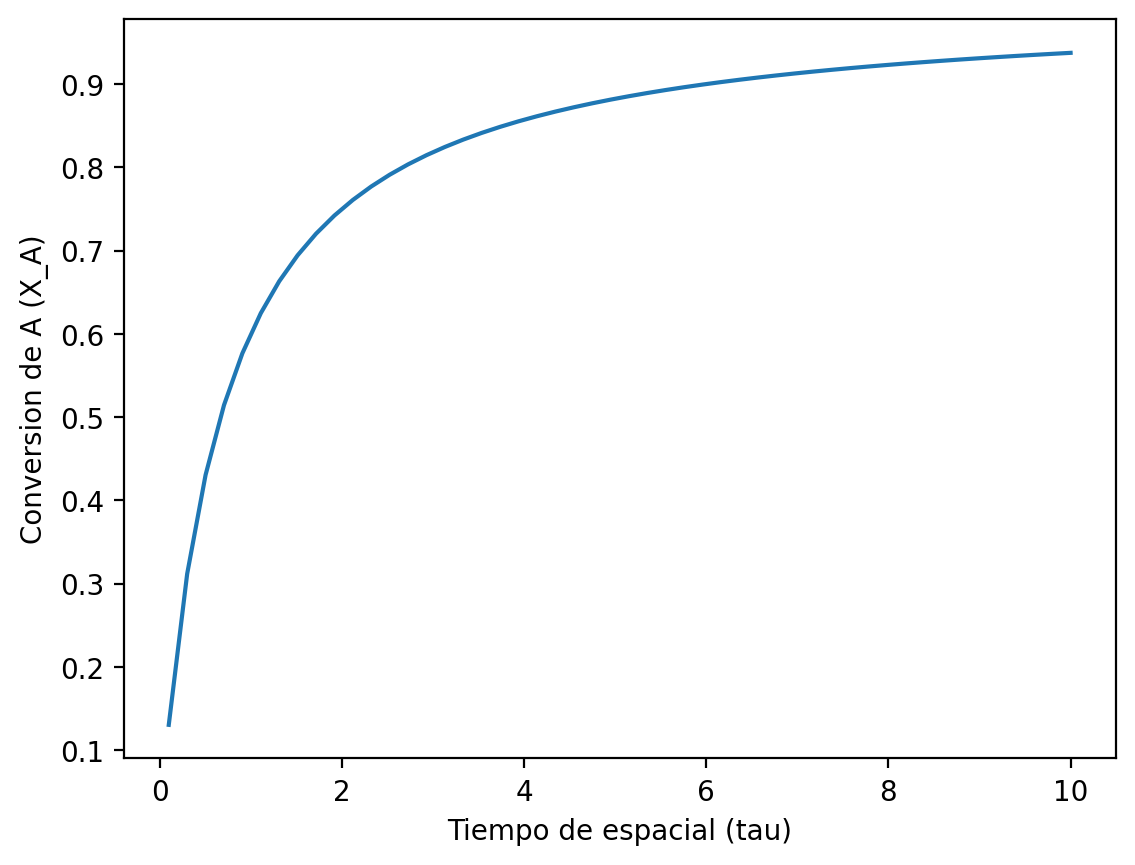

In [3]:
def CA(k1, tau, ca0):
    return ca0 / (1+tau * k1)
def CD(k1, k2, tau, ca0):
    return (k1 * tau * ca0)/((1+ k2 * tau) * (1 + k1 * tau))
def CU(k1, k2, tau, ca0):
    return k2 * CD(k1, k2, tau, ca0) * tau

def XA(k1, tau, ca0):
    return (ca0 - CA(k1, tau, ca0))/ca0

k1 = 1.5
k2 = 0.5 
ca0 = 1
tau = np.linspace(0.1, 10)
plt.figure(dpi = 200)
plt.plot(tau, XA(k1, tau, ca0))
plt.xlabel('Tiempo de espacial (tau)')
plt.ylabel('Conversion de A (X_A)')

Luego, la selectividad instantanea de D sobre U $S_{D/U}$ se define por medio de la siguiente expresión:

$$
S_{D/U} = \frac{r_D}{r_U} = \frac{k_1 C_A - k_2 C_D}{k_2 C_D}
$$

De esta forma, se tiene:


Text(0, 0.5, 'Selectividad')

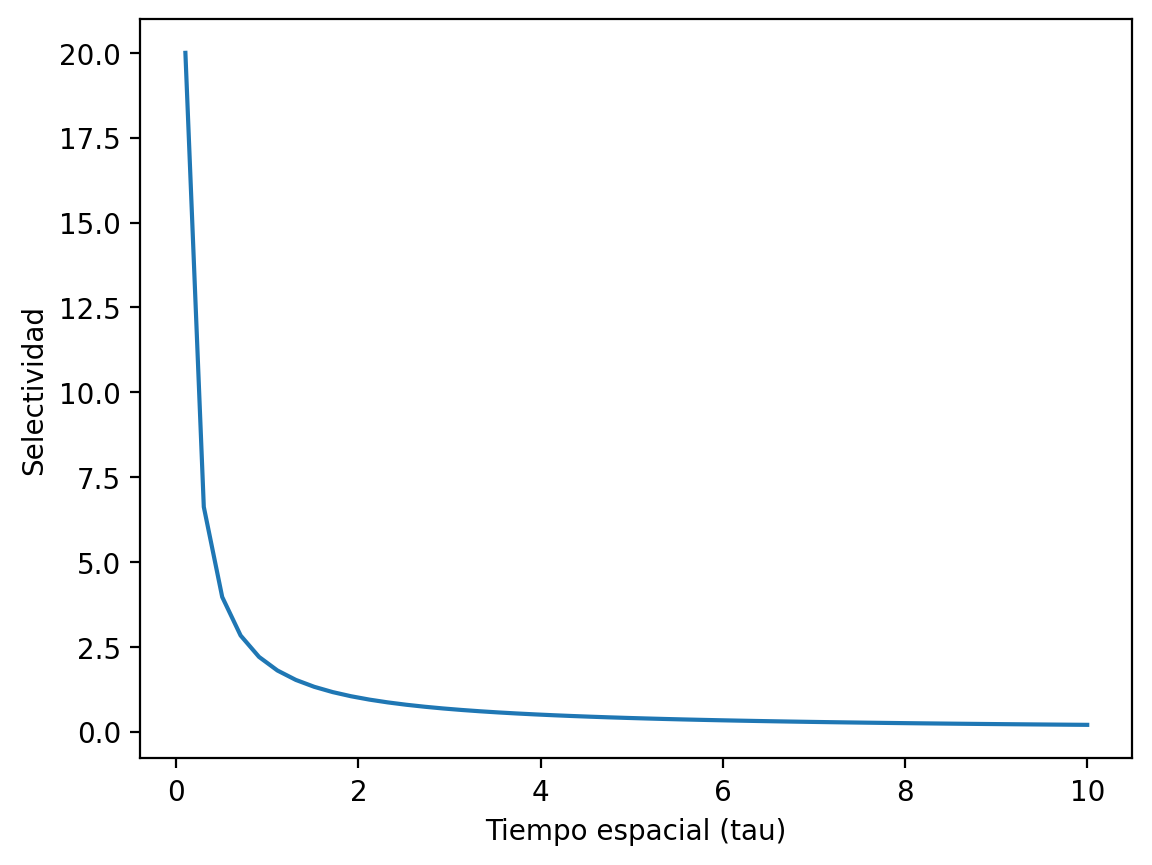

In [4]:
def sel_DU(k1, k2, tau, ca0):
    return (k1 * CA(k1, tau, ca0) - k2 * CD(k1, k2, tau, ca0)) / (k2 * CD(k1, k2, tau, ca0))

k1 = 1.5
k2 = 0.5 
ca0 = 1
tau = np.linspace(0.1, 10)
plt.figure(dpi = 200)
plt.plot(tau, sel_DU(k1,k2, tau, ca0))
plt.xlabel('Tiempo espacial (tau)')
plt.ylabel('Selectividad')

Finalmente, la selectividad instantánea viene dada por:
$$
Y_{D} = \frac{r_D}{-r_A} = \frac{k_1 C_A - k_2 C_D}{ k_1 C_A}
$$

Text(0, 0.5, 'Rendimiento de D (Y_D)')

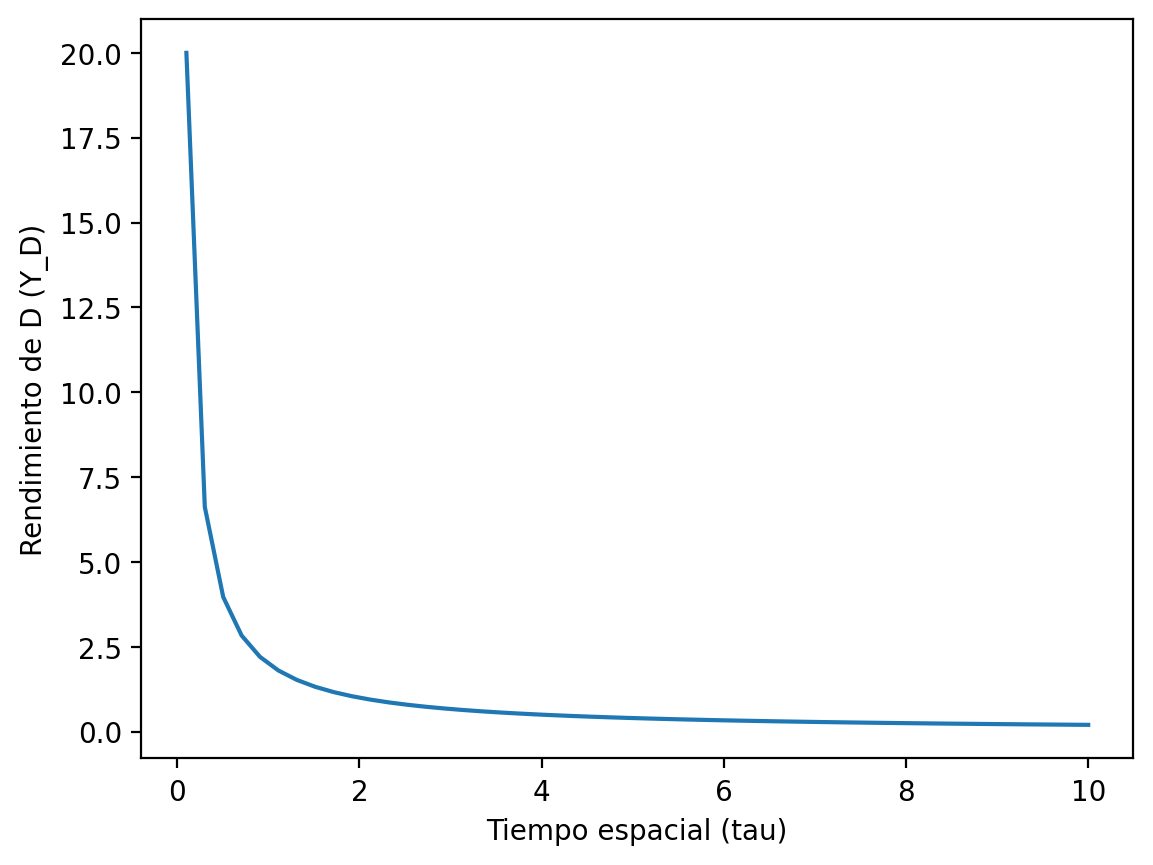

In [5]:
def yield_D(k1, k2, tau, ca0):
    return (k1 * CA(k1, tau, ca0) - k2 * CD(k1, k2, tau, ca0)) / (k1 * CA(k1, tau, ca0))


k1 = 1.5
k2 = 0.5 
ca0 = 1
tau = np.linspace(0.1, 10)
plt.figure(dpi = 200)
plt.plot(tau, sel_DU(k1,k2, tau, ca0))
plt.xlabel('Tiempo espacial (tau)')
plt.ylabel('Rendimiento de D (Y_D)')

## b.

En este caso, es posible encontrar los parámetros mediante minimización de cuadrados. Para esto, definimos el siguiente problema de optimización
$$
k1, k2 = \argmin_{k1, k2} (S_{D/U}(k1, k2) - 0.5) ^ 2 + (X_A(k1,k2) - 0.5) ^  2
$$

Para esto, definimos el siguiente valor:

In [6]:
def min_obj(k1k2, # variables
            tau, ca0 # params
            ):
    k1, k2 = k1k2
    sdu = sel_DU(k1, k2, tau, ca0)
    xa = XA(k1, tau, ca0)
    return (sdu - 0.5)**2 + (xa - 0.5)**2

tau = 1
ca0 = 1
res = minimize(min_obj, 
         x0 = [1,1],
         args = (tau, ca0))
k1_opt, k2_opt = res.x
print('k1_optimo',k1_opt, 'k2_optimo', k2_opt)



k1_optimo 1.0 k2_optimo 1.9999999776482582


Verificamos que los k1 y k2 encontrados generan los valores iniciales de Xa y S_d/u.

In [7]:
# verificamos con las expresiones definidas p
print('XA:', XA(k1_opt, tau, ca0), 'S_d/u:', sel_DU(k1_opt, k2_opt, tau, ca0))

XA: 0.5 S_d/u: 0.5000000055879354


# 2.

## a.

Definimos las ecuaciones diferenciales del problema:
$$
\begin{align*}
r_A &= -k_1 \cdot (C_A - \frac{C_D}{K_1}) - k_2 \cdot (C_A -  \frac{C_U}{K_2})\\
r_D &= k_1 \cdot (C_A - \frac{C_D}{K_1})\\
r_U &= k_2 \cdot (C_A -  \frac{C_U}{K_2})
\end{align*}
$$

Debido a que las concentraciones se encuentran acopladas, no es posible resolverlas de forma individual. Por lo tanto, se define el siguiente sistema de ecuaciones diferenciales en `Python` para resolver el problema:


tiempo en estado casi estacionario: 11.902331902331904 mins
Cd en estado casi estacionario: 0.7978826120025628 M
Valor de dCd/dt en estado casi estacionario: 0.0009999848352341412


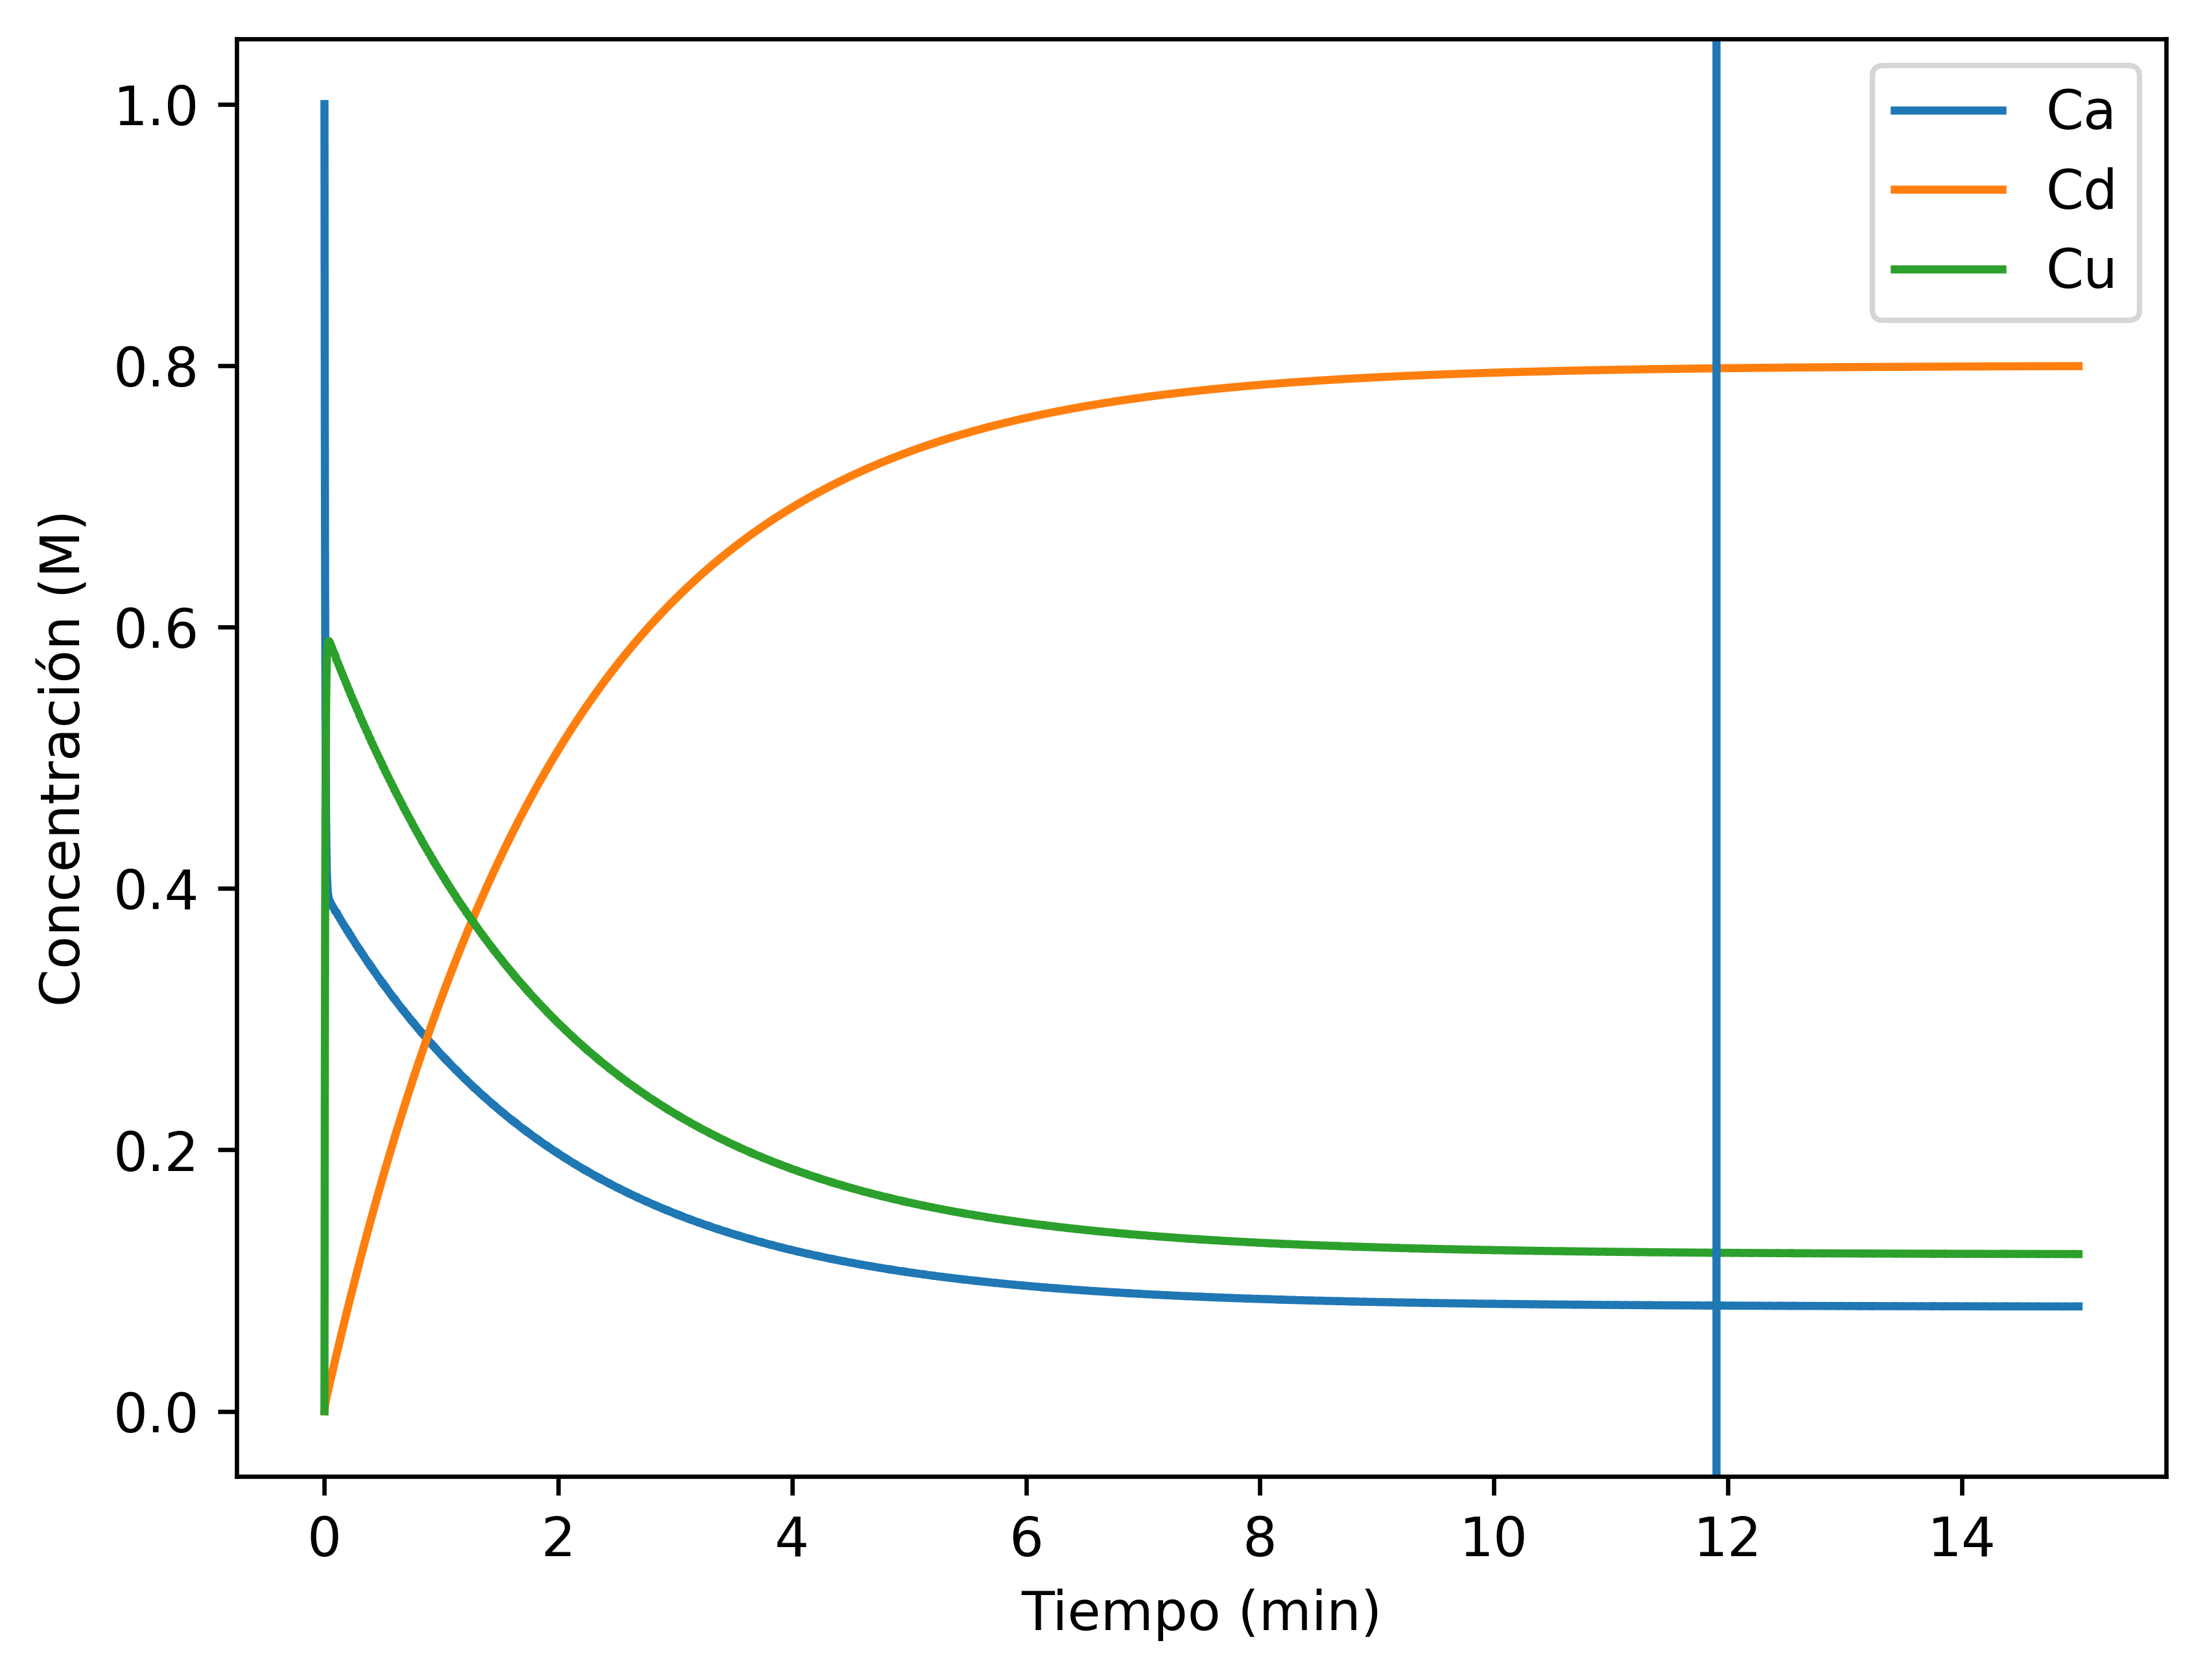

In [8]:
def dC_dt(t, C, k1, k2, K1, K2):
    Ca, Cd, Cu = C
    # dCa/dt
    dCa_dt = -k1 * (Ca - (Cd/K1)) - k2 * (Ca - (Cu/K2))
    # dCd/dt
    dCd_dt = k1 * (Ca - (Cd/K1))
    # dCu/dt
    dCu_dt = k2 * (Ca - (Cu/K2))
    return [dCa_dt, dCd_dt, dCu_dt]
# parámetros conocidos
k1 = 1.0
K1 = 10.0
k2 = 100.0
K2 = 1.5
C0 = [
    1.0, # Ca0
    0.0, # Cd0
    0.0  # Cu0
]

t_span = (0, 15)
t_eval = np.linspace(t_span[0], t_span[1], int(1000000))
sol = solve_ivp(dC_dt, # función que define las ODEs
                t_span = t_span, # intervalo de integración
                y0 = C0, # condiciones iniciales
                args = (k1, k2, K1, K2), # parámetros adicionales de la función RECUERDEN EL ORDEN
                t_eval=t_eval, # tiempo en el cuál extraer valores
                method = 'RK45' # método de integración
                ) # resolvemos la ODE
plt.figure(dpi = 600)
plt.plot(sol.t, sol.y[0], label='Ca')
plt.plot(sol.t, sol.y[1], label='Cd')
plt.plot(sol.t, sol.y[2], label='Cu')
plt.xlabel('Tiempo (min)')
plt.ylabel('Concentración (M)')
plt.legend()



dCd_dt = k1 * (sol.y[0] - (sol.y[1]/K1))
ind = np.where(np.abs(dCd_dt) < 1e-3)[0][0] # buscamos donde se hace casi cero

plt.axvline(sol.t[ind])

print('tiempo en estado casi estacionario:', sol.t[ind], 'mins')
print('Cd en estado casi estacionario:', sol.y[1][ind], 'M')
print('Valor de dCd/dt en estado casi estacionario:', dCd_dt[ind])



Al analizar la figura, es posible identificar que las concentración de D es mayor a la de U y A, por lo cuál se va a querer parar la reacción cuando se llega al equilibrio, que es aproximadamente a los 12 minutos (11.951951951951951 mins). 

# b.

Enfoque 1:
Máximo de la concentración numérica.

In [9]:
cu = sol.y[2]
max_cu = np.argmax(cu) # con esta función se obtiene el índice del máximo
print('Tiempo óptimo (min):', sol.t[max_cu]) 

Tiempo óptimo (min): 0.03693003693003693


Enfoque 2: Derivada de U cambia de signo

In [10]:
dCu_dt = k2 * (sol.y[0] - (sol.y[2]/K2)) # definimos la derivada en base a la ecuación diferencial
ind = np.where(np.diff(np.sign(dCu_dt)))[0][0] # buscamos donde cambia de signo
print('tiempo en que la derivada cambia de signo:', sol.t[ind], 'mins')

tiempo en que la derivada cambia de signo: 0.03627003627003627 mins


# c.

Debido a que cuando las concentraciones llegan al equilibrio, estas no cambian, es posible encontrar las concentraciones en este estado con un tiempo lo suficientemente grande.

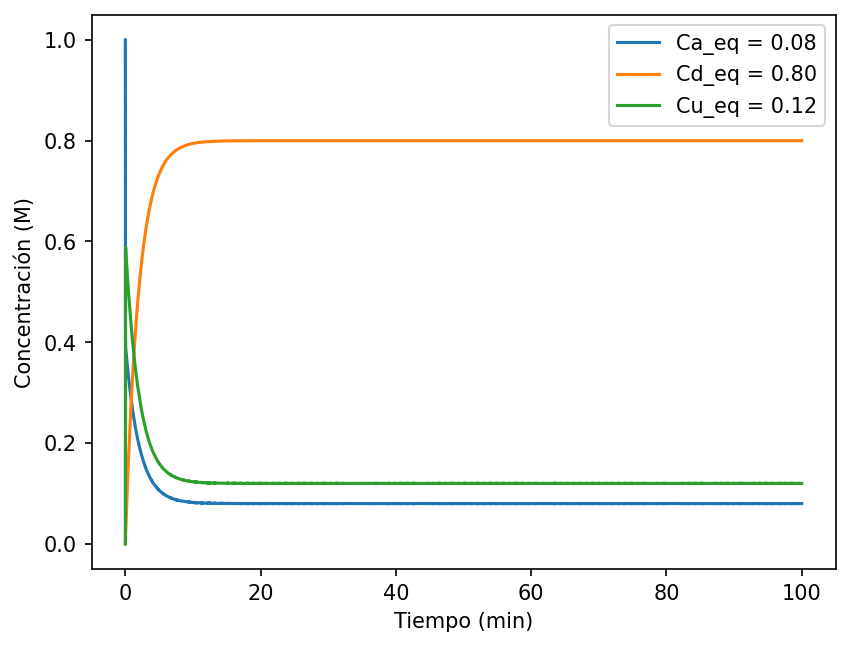

In [11]:
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
sol = solve_ivp(dC_dt, # función que define las ODEs
                t_span = t_span, # intervalo de integración
                y0 = C0, # condiciones iniciales
                args = (k1, k2, K1, K2), # parámetros adicionales de la función RECUERDEN EL ORDEN
                t_eval=t_eval, # tiempo en el cuál extraer valores
                method = 'RK45' # método de integración
                ) # resolvemos la ODE
plt.figure(dpi = 150)
eq_con = [sol.y[0][-1], sol.y[1][-1], sol.y[2][-1]]

plt.plot(sol.t, sol.y[0], label=f'Ca_eq = {eq_con[0]:.2f}')
plt.plot(sol.t, sol.y[1], label=f'Cd_eq = {eq_con[1]:.2f}')
plt.plot(sol.t, sol.y[2], label=f'Cu_eq = {eq_con[2]:.2f}')
plt.xlabel('Tiempo (min)')
plt.ylabel('Concentración (M)')
plt.legend()
plt.show()

# d.

En esta situación, es conveniente estudiar los balances en forma de un sistema de ecuaciones lineales. En esta situación, debemos generar un sistema de la siguiente forma:
$$ 
\mathbf{Ax} = \mathbf{b}
$$
Donde $\mathbf{x} = [C_A, C_D, C_U]^T$ y $\mathbf{b} = [- C_{A0}, 0, 0]^T$, y la matriz A se obtiene a partir de los balances de masa en estado estacionario:
**para A**
$$
\begin{align*}
IN - OUT + Generacion &= 0\\
C_{A0} - C_A + r_A \tau &=0 \\
C_{A0} - C_A - k_1 (C_A - \frac{C_D}{K_1}) \tau - k_2 (C_A -  \frac{C_U}{K_2}) \tau &=0 \\
C_{A0} + C_A (-1 -k_1 \tau - k_2 \tau) + C_D (\frac{k_1 \tau}{K_1}) + C_U (\frac{k_2 \tau}{K_2}) &=0 \\
\Rightarrow \quad C_A (-1 -k_1 \tau - k_2 \tau) + C_D (\frac{k_1 \tau}{K_1}) + C_U (\frac{k_2 \tau}{K_2}) &= -C_{A0}
\end{align*}
$$

**para D**
$$
\begin{align*}
IN - OUT + Generacion &= 0\\
0 - C_D + r_D \tau &=0 \\
0 - C_D + k_1 (C_A - \frac{C_D}{K_1}) \tau &=0 \\
k_1 C_A \tau + C_D (-1 - \frac{k_1 \tau}{K_1}) + 0 \cdot C_U &=0 \\
\Rightarrow \quad C_A (k_1 \tau)+ C_D (-1 - \frac{k_1 \tau}{K_1}) + 0 \cdot C_U &=0
\end{align*}
$$

**para U**
$$
\begin{align*}
IN - OUT + Generacion &= 0\\
0 - C_U + r_U \tau &=0 \\
0 - C_U + k_2 (C_A -  \frac{C_U}{K_2}) \tau &=0 \\
k_2 C_A \tau + 0 \cdot C_D + C_U (-1 - \frac{k_2 \tau}{K_2}) &=0 \\
\Rightarrow \quad C_A (k_2 \tau)+ 0 \cdot C_D + C_U (-1 - \frac{k_2 \tau}{K_2}) &=0
\end{align*}
$$

De esta forma , la ecuación matricial queda de la siguiente forma:
$$
\mathbf{A} = \begin{bmatrix}
-1 -k_1 \tau - k_2 \tau & \frac{k_1 \tau}{K_1} & \frac{k_2 \tau}{K_2}\\
k_1 \tau & -1 - \frac{k_1 \tau}{K_1} & 0 \\
k_2 \tau & 0 & -1 - \frac{k_2 \tau}{K_2}
\end{bmatrix} , \quad
\mathbf{x} = \begin{bmatrix}
C_A \\ C_D \\ C_U
\end{bmatrix} , \quad
\mathbf{b} = \begin{bmatrix}
-C_{A0} \\ 0 \\ 0
\end{bmatrix}
$$

Ahora resolvemos el sistema de ecuaciones lineales con `numpy.linalg.solve`.

In [12]:
# valores
tau = 1
k1 = 1.0
K1 = 10.0
k2 = 100.0
K2 = 1.5
ca0 = 1.0
A = np.array([
    [-1 - k1 * tau - k2 * tau, k1 * tau / K1, k2 * tau / K2],
    [k1 * tau, -1 - k1 * tau / K1, 0],
    [k2 * tau, 0, -1 - k2 * tau / K2]
])
b = np.array([-ca0, 0, 0])
x = np.linalg.solve(A, b)
print('Para tau =', tau)
print(f'Ca: {x[0]:.4f}, Cd: {x[1]:.4f}, Cu: {x[2]:.4f}')


Para tau = 1
Ca: 0.2953, Cd: 0.2684, Cu: 0.4363


In [13]:
# valores
tau = 10
k1 = 1.0
K1 = 10.0
k2 = 100.0
K2 = 1.5
ca0 = 1.0
A = np.array([
    [-1 - k1 * tau - k2 * tau, k1 * tau / K1, k2 * tau / K2],
    [k1 * tau, -1 - k1 * tau / K1, 0],
    [k2 * tau, 0, -1 - k2 * tau / K2]
])
b = np.array([-ca0, 0, 0])
x = np.linalg.solve(A, b)
print('Para tau =', tau)
print(f'Ca: {x[0]:.4f}, Cd: {x[1]:.4f}, Cu: {x[2]:.4f}')


Para tau = 10
Ca: 0.1334, Cd: 0.6669, Cu: 0.1998


In [14]:
# valores
tau = 100
k1 = 1.0
K1 = 10.0
k2 = 100.0
K2 = 1.5
ca0 = 1.0
A = np.array([
    [-1 - k1 * tau - k2 * tau, k1 * tau / K1, k2 * tau / K2],
    [k1 * tau, -1 - k1 * tau / K1, 0],
    [k2 * tau, 0, -1 - k2 * tau / K2]
])
b = np.array([-ca0, 0, 0])
x = np.linalg.solve(A, b)
print('Para tau =', tau)
print(f'Ca: {x[0]:.4f}, Cd: {x[1]:.4f}, Cu: {x[2]:.4f}')


Para tau = 100
Ca: 0.0863, Cd: 0.7843, Cu: 0.1294


# 3.

## a.



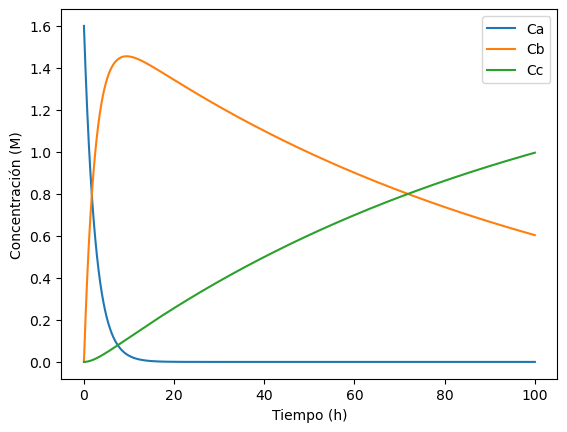

In [22]:
def dCdt(t, c, k1, k2):
	ca, cb, cc = c
	dca_dt = -k1 * ca
	dcb_dt = k1 * ca - k2 * cb
	dcc_dt = k2 * cb
	return [dca_dt, dcb_dt, dcc_dt]

t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
k1 = 0.4
k2 = 0.01
sol = solve_ivp(dCdt, # función que define las ODEs
                t_span = t_span, # intervalo de integración
                y0 = [1.6, 0, 0], # condiciones iniciales
                args = (k1, k2), # parámetros adicionales de la función RECUERDEN EL ORDEN
                t_eval=t_eval, # tiempo en el cuál extraer valores
                method = 'RK45' # método de integración
                ) # resolvemos la ODE

plt.plot(sol.t, sol.y[0], label='Ca'	)
plt.plot(sol.t, sol.y[1], label='Cb'	)
plt.plot(sol.t, sol.y[2], label='Cc'	)
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (M)')
plt.legend()
plt.show()

## b.

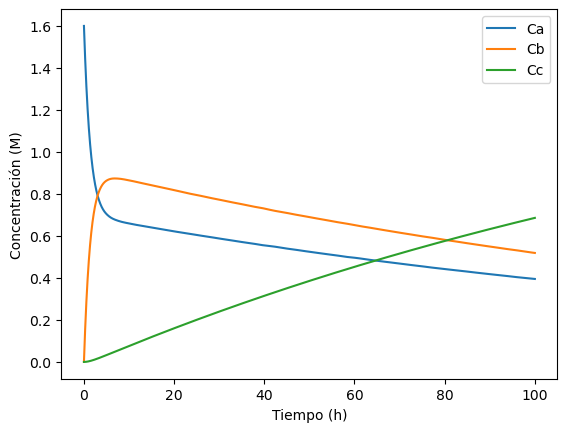

In [16]:

def dCdt(t, c, k1, k2, k1n):
	ca, cb, cc = c
	dca_dt = -k1 * ca + k1n * cb
	dcb_dt = k1 * ca - k2 * cb - k1n * cb
	dcc_dt = k2 * cb
	return [dca_dt, dcb_dt, dcc_dt]

t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
k1 = 0.4
k2 = 0.01
k1n = 0.3
sol = solve_ivp(dCdt, # función que define las ODEs
                t_span = t_span, # intervalo de integración
                y0 = [1.6, 0, 0], # condiciones iniciales
                args = (k1, k2, k1n), # parámetros adicionales de la función RECUERDEN EL ORDEN
                t_eval=t_eval, # tiempo en el cuál extraer valores
                method = 'RK45' # método de integración
                ) # resolvemos la ODE

plt.plot(sol.t, sol.y[0], label='Ca'	)
plt.plot(sol.t, sol.y[1], label='Cb'	)
plt.plot(sol.t, sol.y[2], label='Cc'	)
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (M)')
plt.legend()
plt.show()

## c.

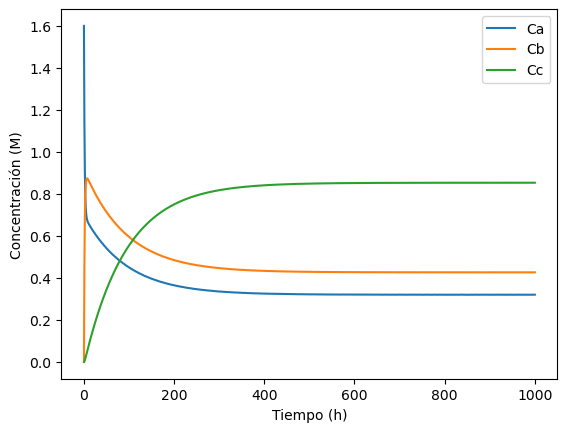

In [17]:
def dCdt(t, c, k1, k2, k1n, k2n):
	ca, cb, cc = c
	dca_dt = -k1 * ca + k1n * cb
	dcb_dt =  k1 * ca - k1n * cb - k2 * cb  + k2n * cc
	dcc_dt = k2 * cb - k2n * cc
	return [dca_dt, dcb_dt, dcc_dt]

t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
k1 = 0.4
k2 = 0.01
k1n = 0.3
k2n = 0.005
sol = solve_ivp(dCdt, # función que define las ODEs
                t_span = t_span, # intervalo de integración
                y0 = [1.6, 0, 0], # condiciones iniciales
                args = (k1, k2, k1n, k2n), # parámetros adicionales de la función RECUERDEN EL ORDEN
                t_eval=t_eval, # tiempo en el cuál extraer valores
                method = 'RK45' # método de integración
                ) # resolvemos la ODE

plt.plot(sol.t, sol.y[0], label='Ca'	)
plt.plot(sol.t, sol.y[1], label='Cb'	)
plt.plot(sol.t, sol.y[2], label='Cc'	)
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración (M)')
plt.legend()


## d.

En esta situación, es posible calcular la selecitvidad de los tiempos en donde se maximiza la concentración de CB. 

In [18]:
# simulamos de nuevo 
def dCdt_a(t, c, k1, k2): # inciso a
	ca, cb, cc = c
	dca_dt = -k1 * ca
	dcb_dt = k1 * ca - k2 * cb
	dcc_dt = k2 * cb
	return [dca_dt, dcb_dt, dcc_dt] 

def dCdt_b(t, c, k1, k2, k1n): # inciso b
    ca, cb, cc = c
    dca_dt = -k1 * ca + k1n * cb
    dcb_dt = k1 * ca - k2 * cb - k1n * cb
    dcc_dt = k2 * cb
    return [dca_dt, dcb_dt, dcc_dt]
def dCdt_c(t, c, k1, k2, k1n, k2n): # inciso c
    ca, cb, cc = c
    dca_dt = -k1 * ca + k1n * cb
    dcb_dt =  k1 * ca - k1n * cb - k2 * cb  + k2n * cc
    dcc_dt = k2 * cb - k2n * cc
    return [dca_dt, dcb_dt, dcc_dt]

t_span = (0, 20) # todos el maximo esta antes de 20
t_eval = np.linspace(t_span[0], t_span[1], 10000)   
k1 = 0.4
k2 = 0.01
k1n = 0.3
k2n = 0.005
sol_a = solve_ivp(dCdt_a, t_span, [1.6, 0, 0], args = (k1, k2), t_eval=t_eval, method = 'RK45')
sol_b = solve_ivp(dCdt_b, t_span, [1.6, 0, 0], args = (k1, k2, k1n), t_eval=t_eval, method = 'RK45')
sol_c = solve_ivp(dCdt_c, t_span, [1.6, 0, 0], args = (k1, k2, k1n, k2n), t_eval=t_eval, method = 'RK45')
# buscamos el maximo de cb en cada caso, utilizamos argmax para aproximarlo
max_cb_a = np.argmax(sol_a.y[1])
max_cb_b = np.argmax(sol_b.y[1])
max_cb_c = np.argmax(sol_c.y[1])

print(f'Inciso a: tiempo óptimo (min): {sol_a.t[max_cb_a]:.2f}, concentración óptima B (mol/L): {sol_a.y[1][max_cb_a]:.2f}, \n concentración óptima C (mol/L): {sol_a.y[2][max_cb_a]:.2f}\n Concentración A (mol/L): {sol_a.y[0][max_cb_a]:.2f}')
print(f'Inciso b: tiempo óptimo (min): {sol_b.t[max_cb_b]:.2f}, concentración óptima B (mol/L): {sol_b.y[1][max_cb_b]:.2f}, \n concentración óptima C (mol/L): {sol_b.y[2][max_cb_b]:.2f}\n Concentración A (mol/L): {sol_b.y[0][max_cb_b]:.2f}')
print(f'Inciso c: tiempo óptimo (min): {sol_c.t[max_cb_c]:.2f}, concentración óptima B (mol/L): {sol_c.y[1][max_cb_c]:.2f}, \n concentración óptima C (mol/L): {sol_c.y[2][max_cb_c]:.2f}\n Concentración A (mol/L): {sol_c.y[0][max_cb_c]:.2f}')

Inciso a: tiempo óptimo (min): 9.45, concentración óptima B (mol/L): 1.46, 
 concentración óptima C (mol/L): 0.11
 Concentración A (mol/L): 0.04
Inciso b: tiempo óptimo (min): 6.82, concentración óptima B (mol/L): 0.87, 
 concentración óptima C (mol/L): 0.05
 Concentración A (mol/L): 0.68
Inciso c: tiempo óptimo (min): 6.86, concentración óptima B (mol/L): 0.87, 
 concentración óptima C (mol/L): 0.05
 Concentración A (mol/L): 0.68


Recordemos que la selecitividad viene dada por 
$$
S_{B/C} = \frac{r_B}{r_C}
$$
Utilizanod las concentraciones del tiempo indicado.

In [19]:
# para caso a
cb_a_opt_a = sol_a.y[0][max_cb_a]
cb_b_opt_a = sol_a.y[1][max_cb_a]
cb_c_opt_a = sol_a.y[2][max_cb_a]

sel_ba_a = (k1 * cb_a_opt_a - k2 * cb_b_opt_a) / (k2 * cb_b_opt_a)

# para caso b
cb_a_opt_b = sol_b.y[0][max_cb_b]
cb_b_opt_b = sol_b.y[1][max_cb_b]
cb_c_opt_b = sol_b.y[2][max_cb_b]   
sel_ba_b = (k1 * cb_a_opt_b - k2 * cb_b_opt_b - k1n * cb_b_opt_b) / ( k2 * cb_b_opt_b)

# para caso c
cb_a_opt_c = sol_c.y[0][max_cb_c]
cb_b_opt_c = sol_c.y[1][max_cb_c]
cb_c_opt_c = sol_c.y[2][max_cb_c]
sel_ba_c = ( k1 * cb_a_opt_c - k1n * cb_b_opt_c - k2 * cb_b_opt_c  + k2n * cb_c_opt_c) / (k2 * cb_b_opt_c - k2n * cb_c_opt_c)

print('Selección B/C inciso a:', sel_ba_a)
print('Selección B/C inciso b:', sel_ba_b)
print('Selección B/C inciso c:', sel_ba_c)  

Selección B/C inciso a: 0.004993679640552265
Selección B/C inciso b: 0.0390503492692168
Selección B/C inciso c: 0.040362240077022375


## e.

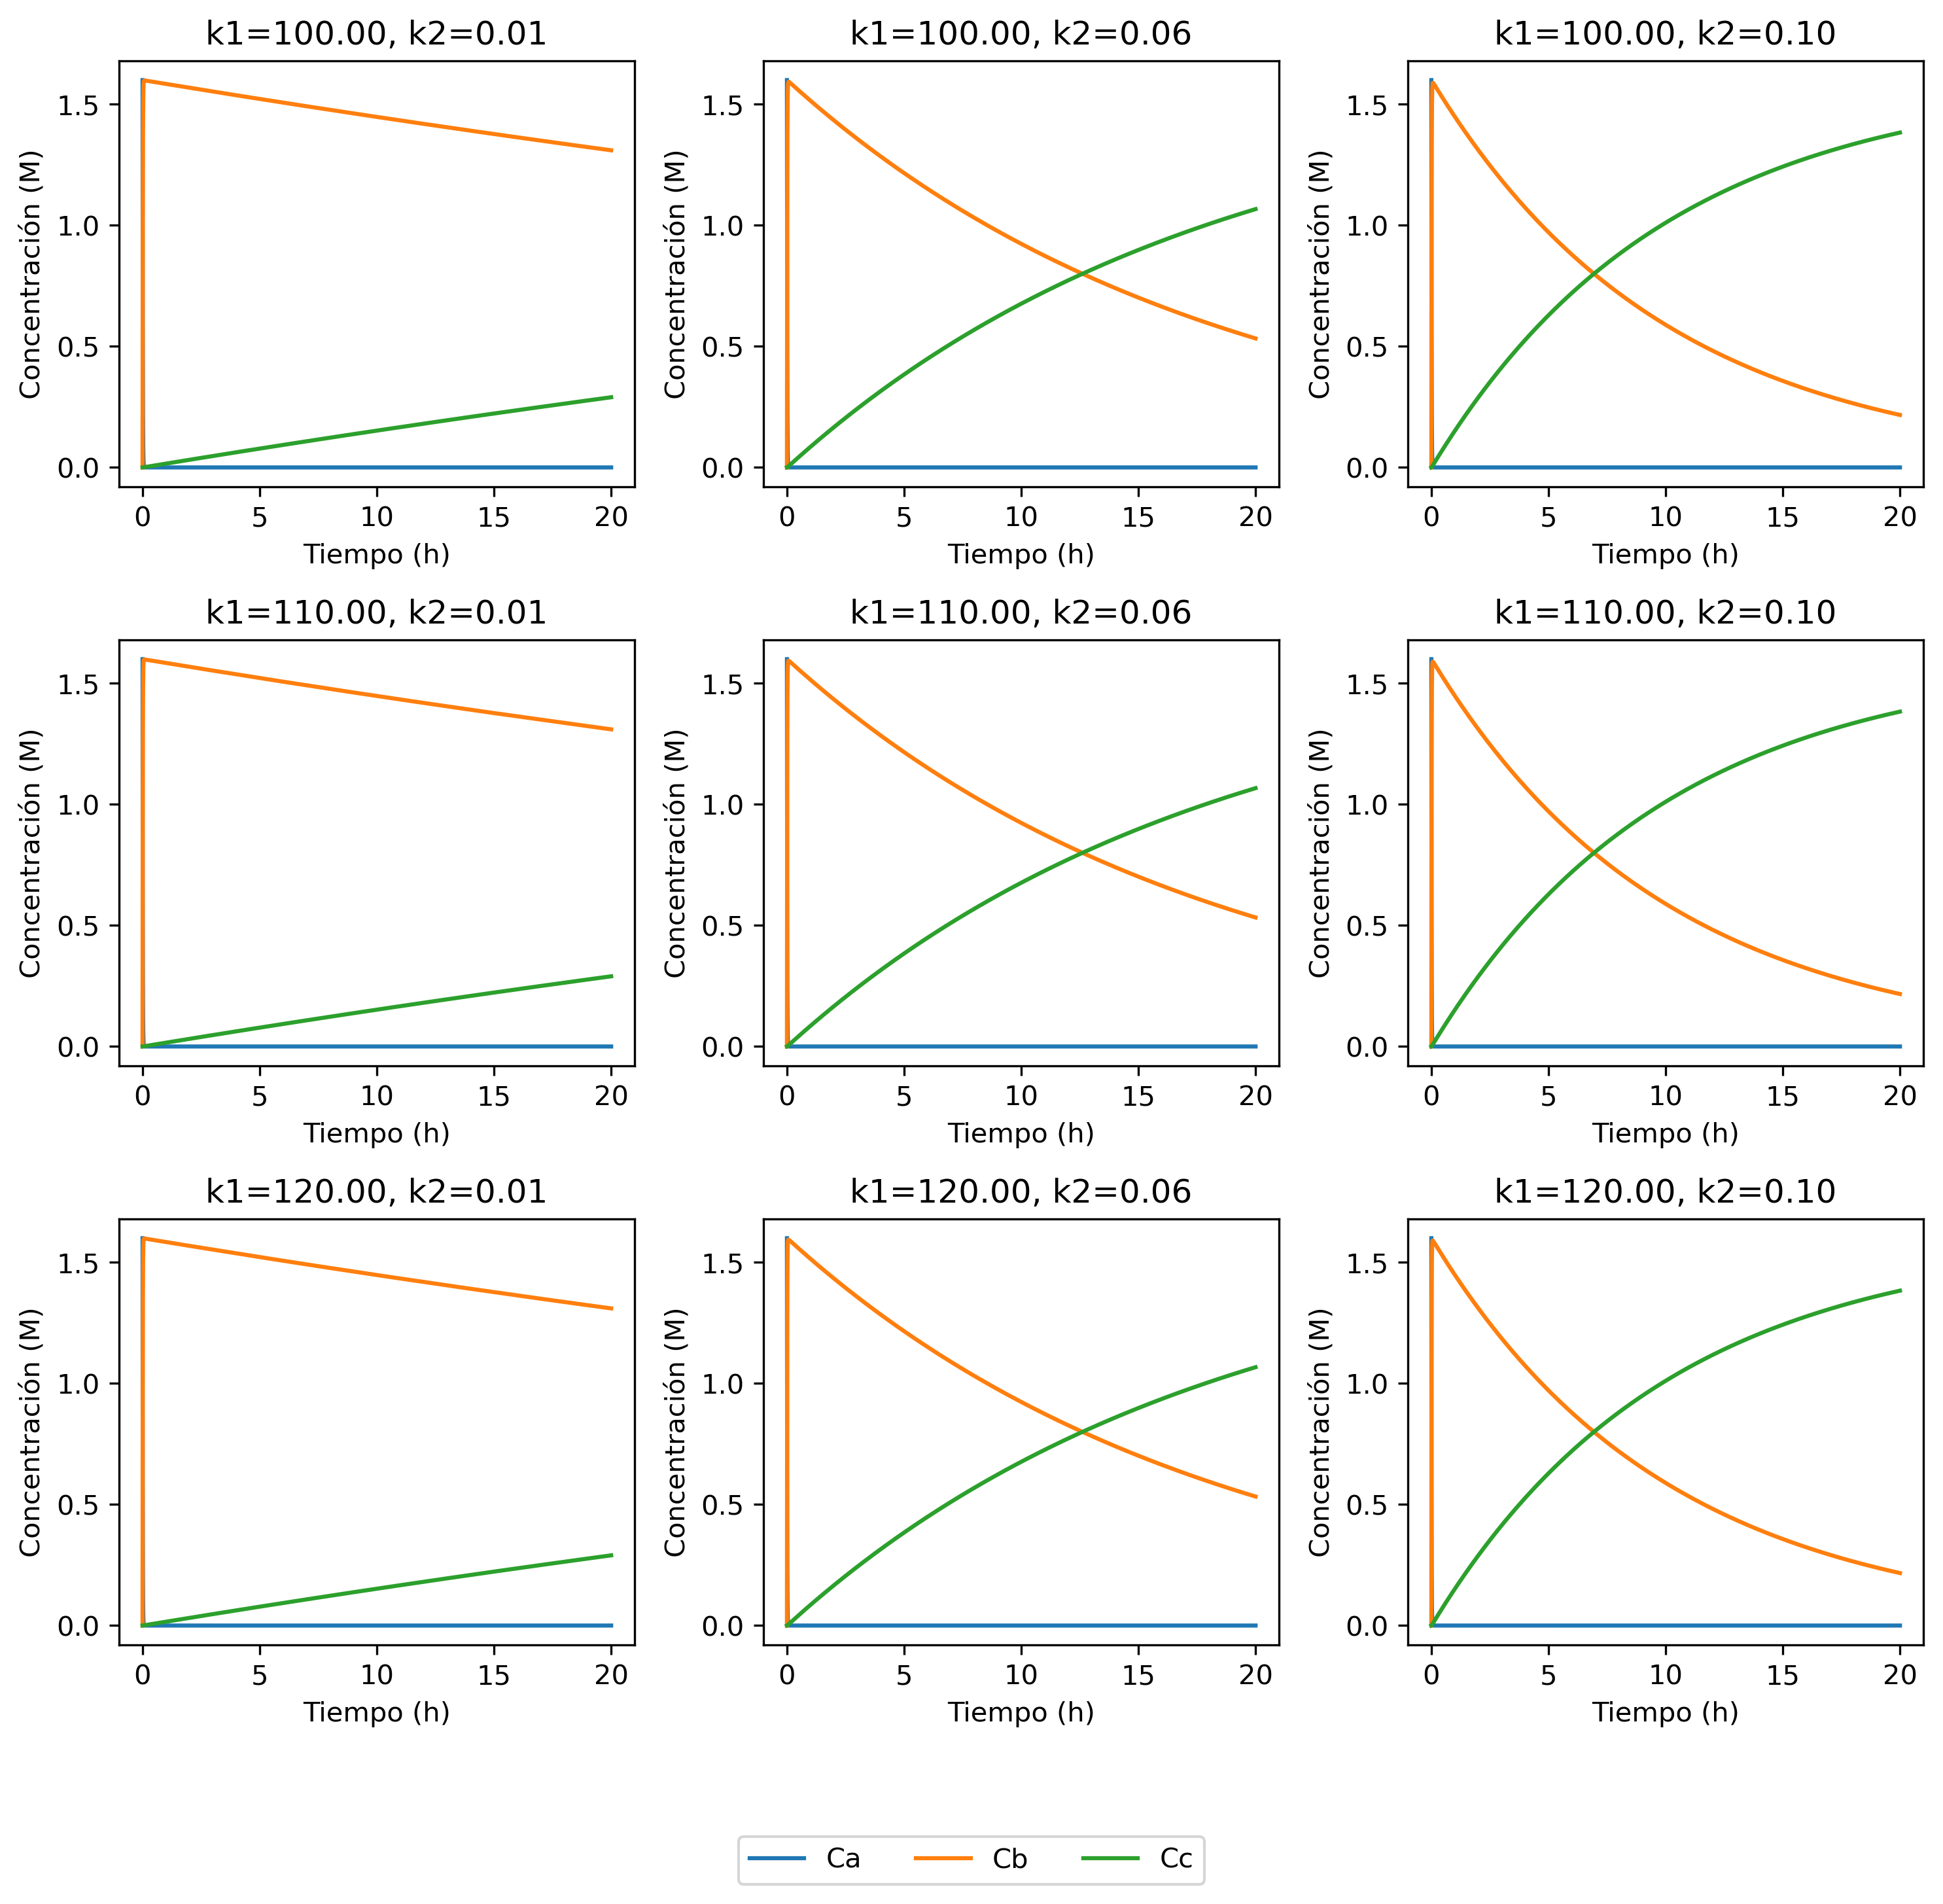

In [20]:
# expresión general
def dCdt_c(t, c, k1, k2, k1n, k2n): # inciso c
    ca, cb, cc = c
    dca_dt = -k1 * ca + k1n * cb
    dcb_dt =  k1 * ca - k1n * cb - k2 * cb  + k2n * cc
    dcc_dt = k2 * cb - k2n * cc
    return [dca_dt, dcb_dt, dcc_dt]

# caso 1
k1 = np.linspace(100, 120, 3)
k2 = np.linspace(0.01, 0.1, 3)
k1n = 0
k2n = 0 
solutions = []
for ki in k1:
    for kj in k2:
        sol = solve_ivp(dCdt_c, t_span, [1.6, 0, 0], args = (ki, kj, k1n, k2n), t_eval=t_eval, method = 'RK45')

        solutions.append((sol, ki, kj))
        
fig, ax = plt.subplots(3,3, dpi = 300, figsize = (10,9))
for sol, ki, kj in solutions:
    max_cb = np.argmax(sol.y[1])
    row = np.where(k1 == ki)[0][0]
    col = np.where(k2 == kj)[0][0]
    ax[row, col].plot(sol.t, sol.y[0], label='Ca'	)
    ax[row, col].plot(sol.t, sol.y[1], label='Cb'	)
    ax[row, col].plot(sol.t, sol.y[2], label='Cc'	)
    ax[row, col].set_title(f'k1={ki:.2f}, k2={kj:.2f}')
    ax[row, col].set_xlabel('Tiempo (h)')
    ax[row, col].set_ylabel('Concentración (M)')

fig.legend(['Ca', 'Cb', 'Cc'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.08))
plt.tight_layout()
        

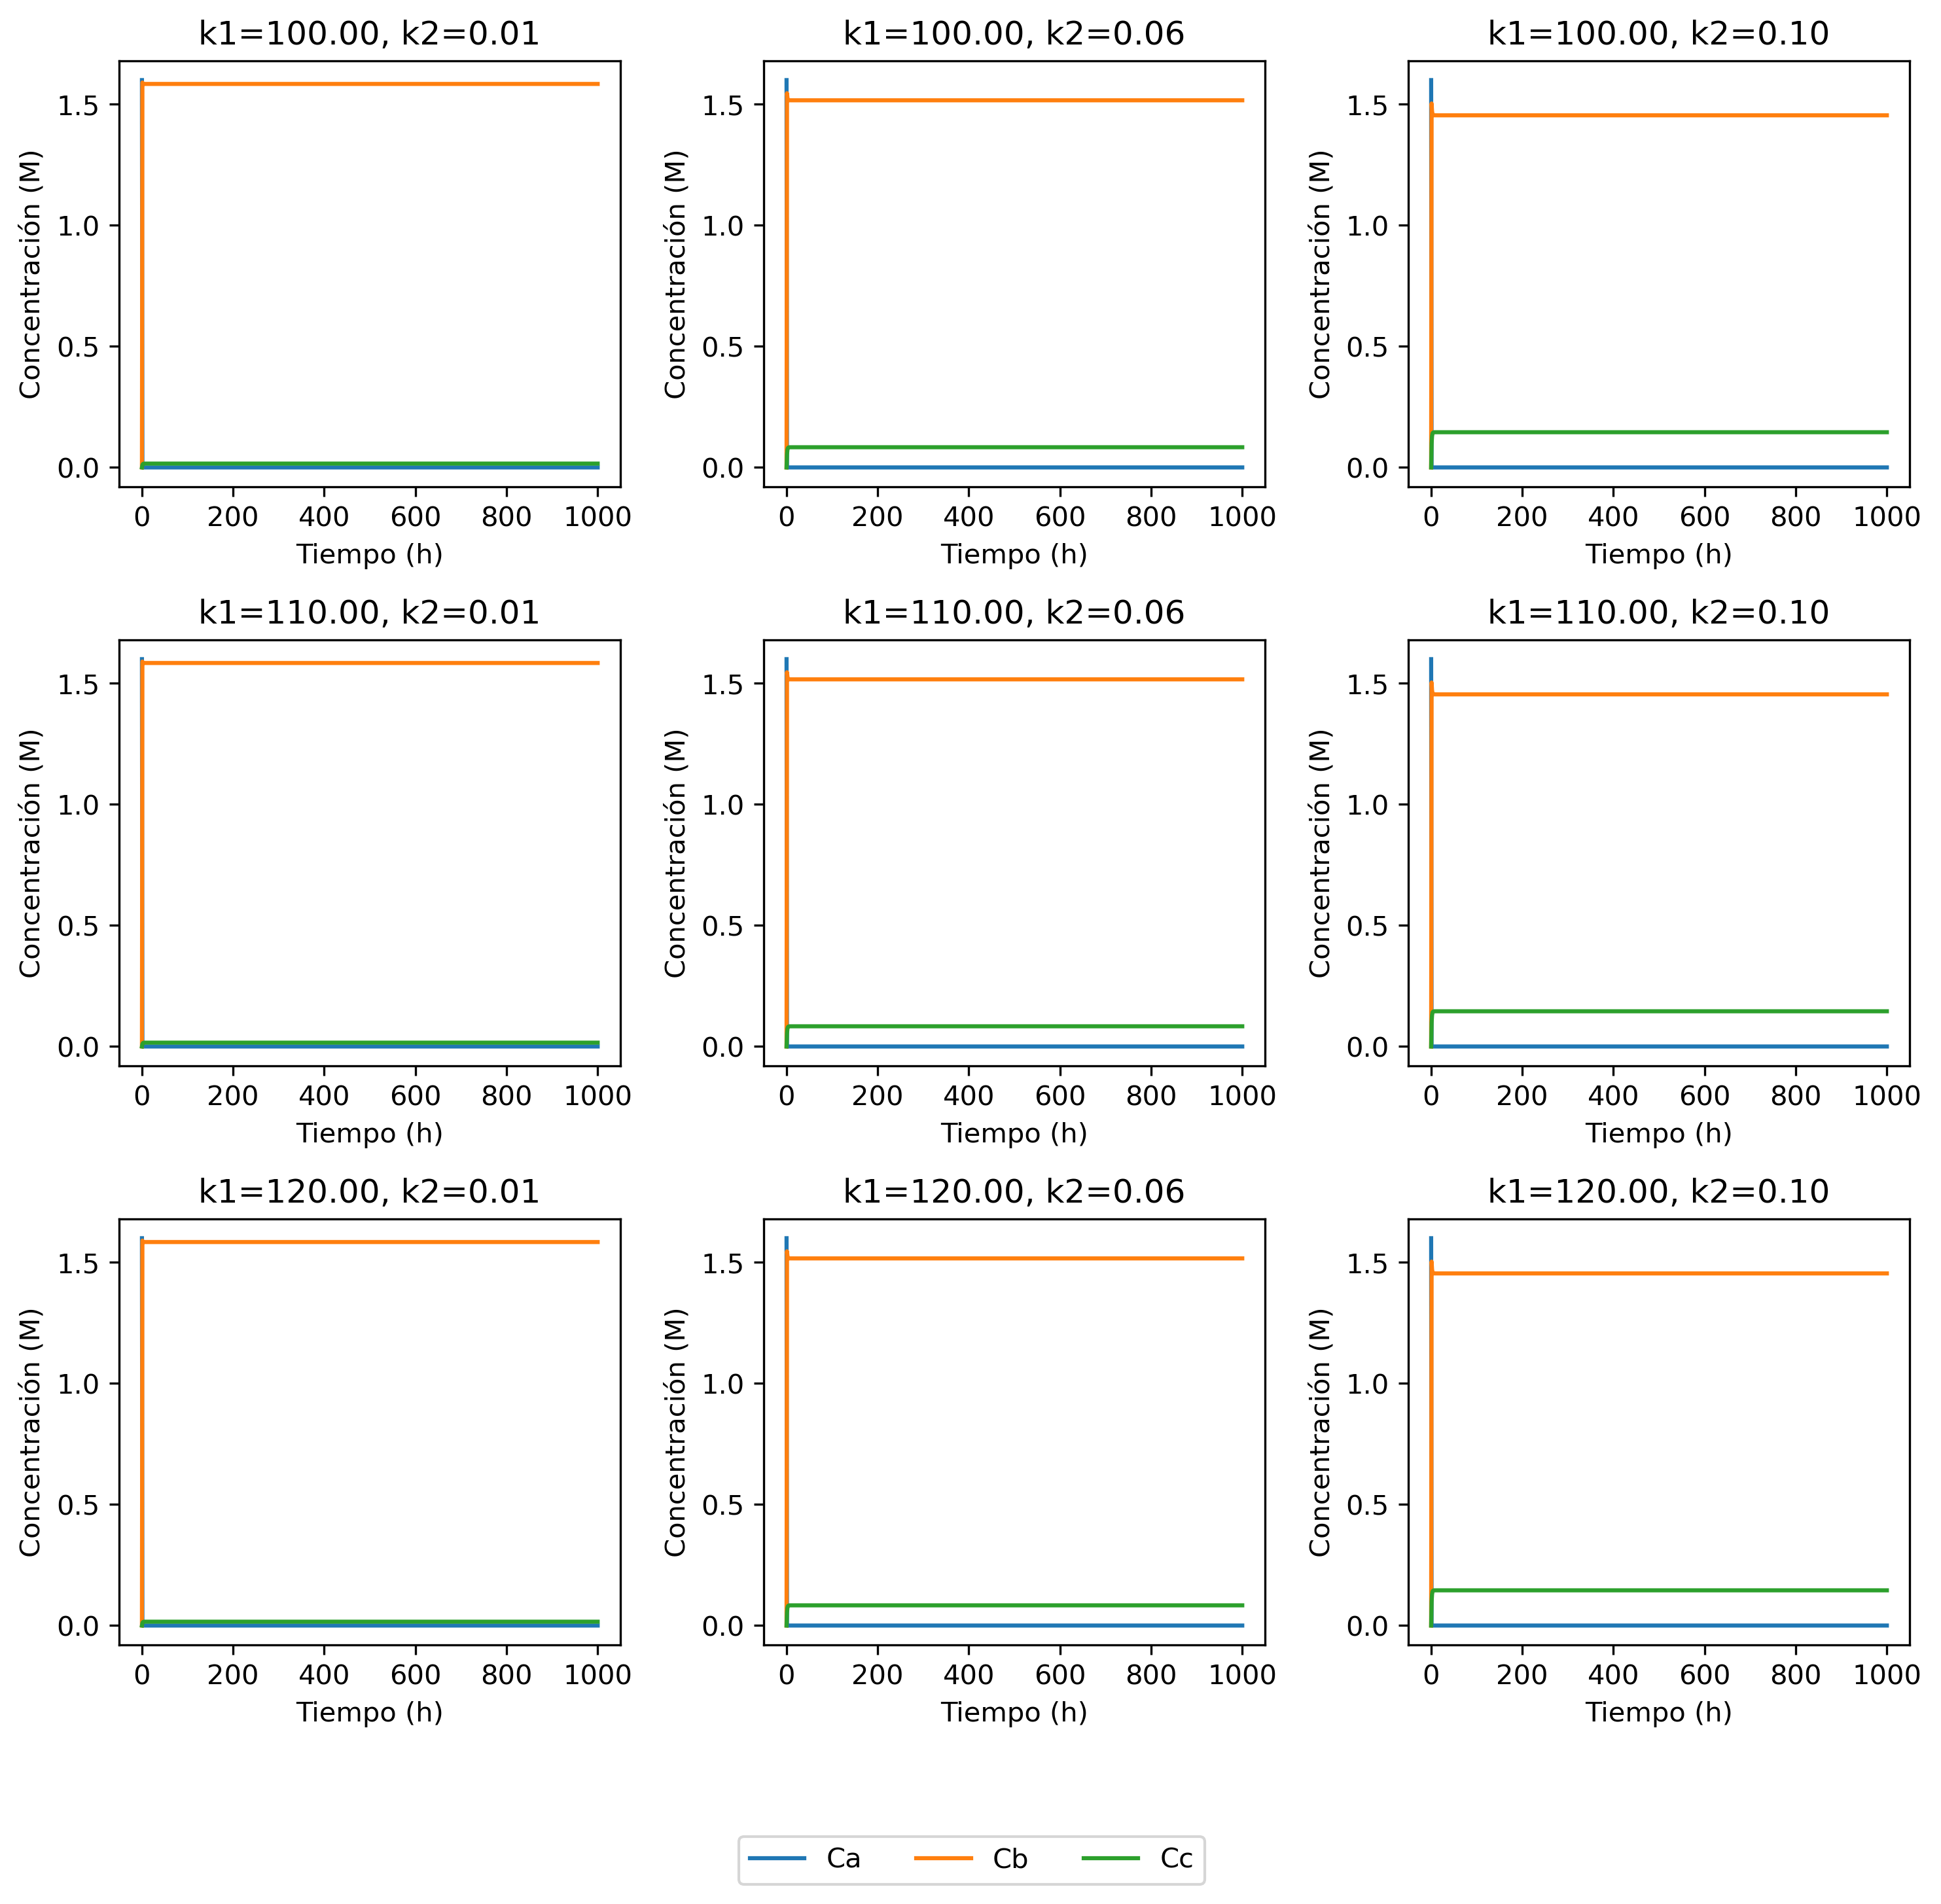

In [21]:
# expresión general
def dCdt_c(t, c, k1, k2, k1n, k2n): # inciso c
    ca, cb, cc = c
    dca_dt = -k1 * ca + k1n * cb
    dcb_dt =  k1 * ca - k1n * cb - k2 * cb  + k2n * cc
    dcc_dt = k2 * cb - k2n * cc
    return [dca_dt, dcb_dt, dcc_dt]

# caso 2
t_span = (0, 1000)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
k1 = np.linspace(100, 120, 3)
k2 = np.linspace(0.01, 0.1, 3)
k1n = 0
k2n = 1
solutions = []
for ki in k1:
    for kj in k2:
        sol = solve_ivp(dCdt_c, t_span, [1.6, 0, 0], args = (ki, kj, k1n, k2n), t_eval=t_eval, method = 'RK45')

        solutions.append((sol, ki, kj))
        
fig, ax = plt.subplots(3,3, dpi = 300, figsize = (10,9))
for sol, ki, kj in solutions:
    max_cb = np.argmax(sol.y[1])
    row = np.where(k1 == ki)[0][0]
    col = np.where(k2 == kj)[0][0]
    ax[row, col].plot(sol.t, sol.y[0], label='Ca'	)
    ax[row, col].plot(sol.t, sol.y[1], label='Cb'	)
    ax[row, col].plot(sol.t, sol.y[2], label='Cc'	)
    ax[row, col].set_title(f'k1={ki:.2f}, k2={kj:.2f}')
    ax[row, col].set_xlabel('Tiempo (h)')
    ax[row, col].set_ylabel('Concentración (M)')

fig.legend(['Ca', 'Cb', 'Cc'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.08))
plt.tight_layout()
        